In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from warnings import filterwarnings
from sklearn import preprocessing

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/HousePrices.csv")

In [5]:
df.shape

(1460, 81)

In [6]:
df.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [7]:
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm          1Fam     2Story            7            5   
1      Feedr       Norm          1Fam     1Story            6            8   
2       Norm       Norm          1Fam     2Story            7            5   
3       Norm       Norm          1Fam     2Story            7            5   
4       Norm       Norm          1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ 

In [8]:
df['Dwelling_Type']=df['Dwelling_Type'].astype('O')
df['OverallQual']=df['OverallQual'].astype('O')
df['OverallCond']=df['OverallCond'].astype('O')

In [9]:
df[['Dwelling_Type','OverallQual','OverallCond']].dtypes

Dwelling_Type    object
OverallQual      object
OverallCond      object
dtype: object

In [10]:
df.describe(include='O')

Zone_Class Road_Type Alley Property_Shape LandContour Utilities  \
count        1460      1460    91           1460        1460      1460   
unique          5         2     2              4           4         2   
top            RL      Pave  Grvl            Reg         Lvl    AllPub   
freq         1151      1454    50            925        1311      1459   

       LotConfig LandSlope Neighborhood Condition1 Condition2 Dwelling_Type  \
count       1460      1460         1460       1460       1460          1460   
unique         5         3           25          9          8             5   
top       Inside       Gtl        NAmes       Norm       Norm          1Fam   
freq        1052      1382          225       1260       1445          1220   

       HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
count        1460         1460         1460      1460     1460        1460   
unique          8           10            9         6        8          15   
top        1Story            5            5     Gable  CompShg     VinylSd   
freq          726          397          821      1141     1434         515   

       Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
count         1460       1452      1460      1460       1460     1423   
unique          16          4         4         5          6        4   
top        VinylSd       None        TA        TA      PConc       TA   
freq           504        864       906      1282        647      649   

       BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
count      1423         1422         1423         1422    1460      1460   
unique        4            4            6            6       6         5   
top          TA           No          Unf          Unf    GasA        Ex   
freq       1311          953          430         1256    1428       741   

       CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
count        1460       1459        1460       1460         770       1379   
unique          2          5           4          7           5          6   
top             Y      SBrkr          TA        Typ          Gd     Attchd   
freq         1365       1334         735       1360         380        870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198

In [11]:
df=df.drop(['Id','PoolQC','PoolArea'], axis=1)

In [12]:
df_numeric_features=df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

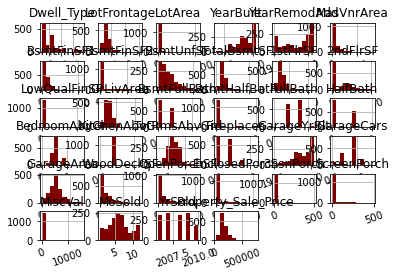

In [13]:
df_numeric_features.hist(xrot=20,color='maroon')
plt.rcParams['figure.figsize']=[15,15]
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Property_Sale_Price'>

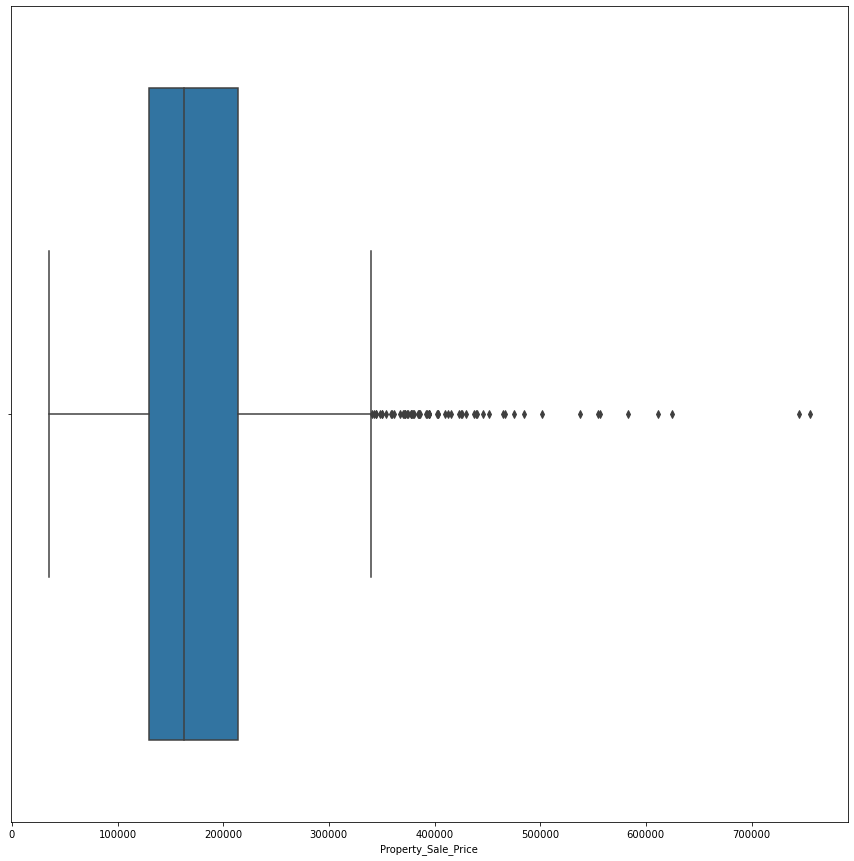

In [14]:
sns.boxplot(df['Property_Sale_Price'])

In [15]:
df_property=df[df['Property_Sale_Price']<500000]
df_property.shape

(1451, 78)

In [16]:
df.isnull().sum()

Dwell_Type                0
Zone_Class                0
LotFrontage             259
LotArea                   0
Road_Type                 0
Alley                  1369
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                8
MasVnrArea                8
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 37
BsmtCond                 37
BsmtExposure             38
BsmtFinType1             37
BsmtFinSF1                0
BsmtFinType2             38
BsmtFinSF2          

In [17]:
df['LotFrontage']=df['LotFrontage'].replace(to_replace=0, value=np.nan)
df['LotFrontage']=df['LotFrontage'].astype(float)
mean=df['LotFrontage'].mean()
df['LotFrontage'].replace(np.nan,mean,inplace=True)

In [18]:
df['MasVnrArea']=df['MasVnrArea'].replace(to_replace=0, value=np.nan)
df['MasVnrArea']=df['MasVnrArea'].astype(float)
mean=df['MasVnrArea'].mean()
df['MasVnrArea'].replace(np.nan,mean,inplace=True)

In [19]:
mode=df['Fence'].mode().values[0]
df['Fence']=df['Fence'].replace(np.nan,mode)
mode

'MnPrv'

In [20]:
mode=df['Alley'].mode().values[0]
df['Alley']=df['Alley'].replace(np.nan,mode)

In [21]:
mode=df['MiscFeature'].mode().values[0]
df['MiscFeature']=df['MiscFeature'].replace(np.nan,mode)

In [22]:
mode=df['BsmtQual'].mode().values[0]
df['BsmtQual']=df['BsmtQual'].replace(np.nan,mode)

In [23]:
mode=df['BsmtCond'].mode().values[0]
df['BsmtCond']=df['BsmtCond'].replace(np.nan,mode)

In [24]:
mode=df['BsmtCond'].mode().values[0]
df['BsmtCond']=df['BsmtCond'].replace(np.nan,mode)

In [25]:
mode=df['BsmtExposure'].mode().values[0]
df['BsmtExposure']=df['BsmtExposure'].replace(np.nan,mode)

In [26]:
mode=df['BsmtFinType1'].mode().values[0]
df['BsmtFinType1']=df['BsmtFinType1'].replace(np.nan,mode)

In [27]:
mode=df['BsmtFinType2'].mode().values[0]
df['BsmtFinType2']=df['BsmtFinType2'].replace(np.nan,mode)

In [28]:
mode=df['FireplaceQu'].mode().values[0]
df['FireplaceQu']=df['FireplaceQu'].replace(np.nan,mode)

In [29]:
df['GarageYrBlt']=df['GarageYrBlt'].replace(to_replace=0, value=np.nan)
df['GarageYrBlt']=df['GarageYrBlt'].astype(float)
mean=df['GarageYrBlt'].mean()
df['GarageYrBlt'].replace(np.nan,mean,inplace=True)

In [30]:
mode=df['MasVnrType'].mode().values[0]
df['MasVnrType']=df['MasVnrType'].replace(np.nan,mode)

In [31]:
mode=df['ExterQual'].mode().values[0]
df['ExterQual']=df['ExterQual'].replace(np.nan,mode)

In [32]:
mode=df['Electrical'].mode().values[0]
df['Electrical']=df['Electrical'].replace(np.nan,mode)

In [33]:
mode=df['GarageType'].mode().values[0]
df['GarageType']=df['GarageType'].replace(np.nan,mode)

In [34]:
mode=df['GarageFinish'].mode().values[0]
df['GarageFinish']=df['GarageFinish'].replace(np.nan,mode)

In [35]:
mode=df['GarageQual'].mode().values[0]
df['GarageQual']=df['GarageQual'].replace(np.nan,mode)

In [36]:
mode=df['GarageCond'].mode().values[0]
df['GarageCond']=df['GarageCond'].replace(np.nan,mode)

In [37]:
df.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


In [38]:
df.dtypes

Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual             object
OverallCond             object
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExposure            object
BsmtFinT

In [39]:
df.describe(include='O')

Zone_Class Road_Type Alley Property_Shape LandContour Utilities  \
count        1460      1460  1460           1460        1460      1460   
unique          5         2     2              4           4         2   
top            RL      Pave  Grvl            Reg         Lvl    AllPub   
freq         1151      1454  1419            925        1311      1459   

       LotConfig LandSlope Neighborhood Condition1 Condition2 Dwelling_Type  \
count       1460      1460         1460       1460       1460          1460   
unique         5         3           25          9          8             5   
top       Inside       Gtl        NAmes       Norm       Norm          1Fam   
freq        1052      1382          225       1260       1445          1220   

       HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
count        1460         1460         1460      1460     1460        1460   
unique          8           10            9         6        8          15   
top        1Story            5            5     Gable  CompShg     VinylSd   
freq          726          397          821      1141     1434         515   

       Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
count         1460       1460      1460      1460       1460     1460   
unique          16          4         4         5          6        4   
top        VinylSd       None        TA        TA      PConc       TA   
freq           504        872       906      1282        647      686   

       BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
count      1460         1460         1460         1460    1460      1460   
unique        4            4            6            6       6         5   
top          TA           No          Unf          Unf    GasA        Ex   
freq       1348          991          467         1294    1428       741   

       CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
count        1460       1460        1460       1460        1460       1460   
unique          2          5           4          7           5          6   
top             Y      SBrkr          TA        Typ          Gd     Attchd   
freq         1365       1335         735       1360        1070        951   

       GarageFinish GarageQual GarageCond PavedDrive  Fence MiscFeature  \
count          1460       1460       1460       1460   1460        1460   
unique            3          5          5          3      4           4   
top             Unf         TA         TA          Y  MnPrv        Shed   
freq            686       1392       1407       1340   1336        1455   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198

In [40]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [Dwell_Type, Zone_Class, LotFrontage, LotArea, Road_Type, Alley, Property_Shape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, Dwelling_Type, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, Property_Sale_Price]
Index: []

In [41]:
dummies=pd.get_dummies(df[['Zone_Class','Road_Type','Alley','Property_Shape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','Dwelling_Type','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']],columns=['Zone_Class','Road_Type','Alley','Property_Shape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','Dwelling_Type','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'])

In [42]:
df=pd.concat([df,dummies],axis=1)

In [43]:
df.isnull().sum()

Dwell_Type               0
Zone_Class               0
LotFrontage              0
LotArea                  0
Road_Type                0
Alley                    0
Property_Shape           0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
Dwelling_Type            0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
T

In [44]:
columns=['Zone_Class','Road_Type','Alley','Property_Shape','LandContour','Utilities','LotConfig','LandSlope',
         'Neighborhood','Condition1','Condition2','Dwelling_Type','HouseStyle','OverallQual','OverallCond',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']

In [45]:
df.isnull().sum()

Dwell_Type               0
Zone_Class               0
LotFrontage              0
LotArea                  0
Road_Type                0
Alley                    0
Property_Shape           0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
Dwelling_Type            0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
T

In [46]:
df.drop(columns,axis=1,inplace=True)

In [47]:
df.corr()

Dwell_Type   LotFrontage   LotArea  YearBuilt  \
Dwell_Type               1.000000 -3.570559e-01 -0.139781   0.027850   
LotFrontage             -0.357056  1.000000e+00  0.306795   0.117598   
LotArea                 -0.139781  3.067946e-01  1.000000   0.014228   
YearBuilt                0.027850  1.175980e-01  0.014228   1.000000   
YearRemodAdd             0.040581  8.274589e-02  0.013788   0.592855   
MasVnrArea               0.001691  1.345621e-01  0.113463   0.034346   
BsmtFinSF1              -0.069836  2.158284e-01  0.214103   0.249503   
BsmtFinSF2              -0.065649  4.333957e-02  0.111170  -0.049107   
BsmtUnfSF               -0.140759  1.221556e-01 -0.002618   0.149040   
TotalBsmtSF             -0.238518  3.633577e-01  0.260833   0.391452   
1stFlrSF                -0.251758  4.142664e-01  0.299475   0.281986   
2ndFlrSF                 0.307886  7.248267e-02  0.050986   0.010308   
LowQualFinSF             0.046474  3.684872e-02  0.004779  -0.183784   
GrLivArea                0.074853  3.683920e-01  0.263116   0.199010   
BsmtFullBath             0.003491  9.148099e-02  0.158155   0.187599   
BsmtHalfBath            -0.002333 -6.419220e-03  0.048046  -0.038162   
FullBath                 0.131608  1.804242e-01  0.126031   0.468271   
HalfBath                 0.177354  4.825836e-02  0.014259   0.242656   
BedroomAbvGr            -0.023438  2.370232e-01  0.119690  -0.070651   
KitchenAbvGr             0.281721 -5.804607e-03 -0.017784  -0.174800   
TotRmsAbvGrd             0.040380  3.201464e-01  0.190015   0.095589   
Fireplaces              -0.045569  2.357546e-01  0.271364   0.147716   
GarageYrBlt              0.080187  6.432419e-02 -0.024812   0.780555   
GarageCars              -0.040110  2.697289e-01  0.154871   0.537850   
GarageArea              -0.098672  3.236629e-01  0.180403   0.478954   
WoodDeckSF              -0.012579  7.710622e-02  0.171698   0.224880   
OpenPorchSF             -0.006100  1.374545e-01  0.084774   0.188686   
EnclosedPorch           -0.012037  9.790061e-03 -0.018340  -0.387268   
3SsnPorch               -0.043825  6.233547e-02  0.020423   0.031355   
ScreenPorch             -0.026030  3.768430e-02  0.043160  -0.050364   
MiscVal                 -0.007683  1.168275e-03  0.038068  -0.034383   
MoSold                  -0.013585  1.015781e-02  0.001205   0.012398   
YrSold                  -0.021407  6.768250e-03 -0.014261  -0.013618   
Property_Sale_Price     -0.084284  3.349009e-01  0.263843   0.522897   
Zone_Class_C (all)      -0.001762 -1.320032e-03 -0.008452  -0.129736   
Zone_Class_FV            0.171336 -9.078099e-02 -0.083895   0.237645   
Zone_Class_RH            0.058288 -4.322404e-02 -0.033092  -0.089183   
Zone_Class_RL           -0.343353  3.251286e-01  0.204065   0.268064   
Zone_Class_RM            0.277750 -3.071674e-01 -0.173709  -0.388683   
Road_Type_Grvl           0.024969  3.732277e-02  0.197131  -0.021137   
Road_Type_Pave          -0.024969 -3.732277e-02 -0.197131   0.021137   
Alley_Grvl              -0.184539  1.717273e-01  0.077747   0.016612   
Alley_Pave               0.184539 -1.717273e-01 -0.077747  -0.016612   
Property_Shape_IR1      -0.112626  1.266301e-01  0.097235   0.204390   
Property_Shape_IR2      -0.019392  3.157947e-02  0.225160   0.078821   
Property_Shape_IR3      -0.031221  1.805454e-01  0.256526   0.045472   
Property_Shape_Reg       0.122030 -1.654515e-01 -0.216111  -0.234501   
LandContour_Bnk          0.017973  3.861293e-02  0.028095  -0.215457   
LandContour_HLS         -0.010676  6.307147e-02  0.089605   0.049723   
LandContour_Low         -0.032201  4.536739e-02  0.359475  -0.006969   
LandContour_Lvl          0.010845 -8.705009e-02 -0.256843   0.118321   
Utilities_AllPub         0.022844  1.789856e-16 -0.010123   0.011505   
Utilities_NoSeWa        -0.022844 -5.447825e-18  0.010123  -0.011505   
LotConfig_Corner        -0.063811  2.276334e-01  0.042722  -0.085088   
LotConfig_CulDSac       -0.044437 -5.783143e-02  0.179440   0.1

In [48]:
x=df.drop(['Property_Sale_Price'],axis=1)
y=df[['Property_Sale_Price']]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [50]:
df.dtypes

Dwell_Type                 int64
LotFrontage              float64
LotArea                    int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
ScreenPorch                int64
MiscVal   

In [51]:
reg=LinearRegression()


In [52]:
reg.fit(x_train,y_train)

LinearRegression()

In [53]:
reg.score(x_train,y_train)

0.9352173868081654

In [54]:
reg.score(x_test,y_test)

0.8953766940685567

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
y_pred=poly_clf.predict(x_test2)


In [57]:
print(poly_clf.score(x_train2,y_train))

1.0


In [58]:
print(poly_clf.score(x_test2,y_test))

-0.8251359133569427


In [59]:
y_pred=reg.predict(x_test)

In [60]:
#mae
print(mean_absolute_error(y_test,y_pred))

18147.84149524608


In [61]:
#mse
print(mean_squared_error(y_test,y_pred))

747042086.6598775


In [62]:
from math import sqrt

In [63]:
print(sqrt(mean_squared_error(y_test,y_pred)))

27332.07066176797


In [64]:
#r^2
from sklearn.metrics import r2_score
R_square=r2_score(y_test,y_pred)
print(R_square)

0.8953766940685567
